## Business Objective:

To analyze Netflix’s content library to understand content type distribution, country-wise production, genre dominance, and trends over time only using Pandas.

### Key Questions:

- Has Netflix’s content production increased over the years?

- Which countries dominate content creation?

- What genres are most common on the platform?

- Does Netflix focus more on movies or TV shows?

## Importing Pandas 

In [1]:
import pandas as pd

In [2]:
# Reading data dile using Pandas

df = pd.read_csv("netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


### Type conversion of date_added column

In [4]:
df['date_added'] = pd.to_datetime(df['date_added'], format='mixed')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB


### Handling the NULL values

In [5]:
# Finding the total NULL's in every column.

df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [6]:
# Dropping the NULL's in date_added column as it is <0.2%.

df.dropna(subset = ['date_added'], inplace = True)
df.isnull().sum()

show_id            0
type               0
title              0
director        2624
cast             825
country          830
date_added         0
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [7]:
# Substituting the Null values in 'director',  'cast', 'country' columns with 'Unkown' and 'rating', 'duration' with 'N/A' for better understanding.

df[['director', 'cast', 'country']] = df[['director', 'cast', 'country']].fillna("Unknown")
df[['rating', 'duration']] = df[['rating', 'duration']].fillna("N/A")
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [8]:
#Handling incorrect spellings in the data.

df[['director', 'cast', 'country']] = df[['director', 'cast', 'country']].replace('Unkown', 'Unknown')

In [9]:
df['country'].value_counts()

country
United States                                    2812
India                                             972
Unknown                                           830
United Kingdom                                    418
Japan                                             244
                                                 ... 
Russia, Spain                                       1
Croatia, Slovenia, Serbia, Montenegro               1
Japan, Canada                                       1
United States, France, South Korea, Indonesia       1
Canada, Mexico, Germany, South Africa               1
Name: count, Length: 749, dtype: int64

In [10]:
# Splitting multiple data in a row to introduce atomicity using explode() so that each row contains only one country.

df['country_split'] = df['country'].str.split(', ')
df = df.explode('country_split')
df['country_split'].value_counts()

country_split
United States     3683
India             1046
Unknown            830
United Kingdom     803
Canada             445
                  ... 
Sudan                1
Panama               1
Uganda               1
East Germany         1
Montenegro           1
Name: count, Length: 128, dtype: int64

In [11]:
# Finding Top Directors by Number of Titles

df[df['director'] != 'Unknown'] \
.groupby('director')['title'] \
.count() \
.sort_values(ascending=False)

director
Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Martin Scorsese           18
Steven Spielberg          18
Youssef Chahine           17
                          ..
Yin Chen-hao               1
Yoo Byung-jae              1
Yoon Sung-hyun             1
Yoshiyuki Momose           1
Yoshiyuki Tomino           1
Name: title, Length: 4528, dtype: int64

In [12]:
df.duplicated().sum()

np.int64(0)

### Data Visualization

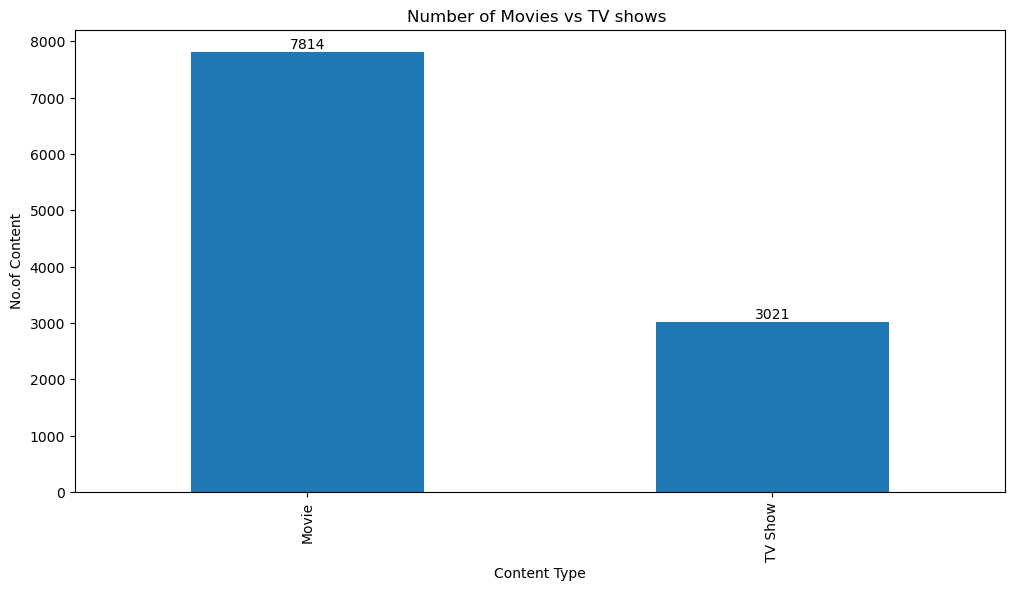

In [13]:
ax1 = df['type'].value_counts().plot(kind = 'bar', figsize = (12,6))
ax1.set_xlabel("Content Type")
ax1.set_ylabel("No.of Content")
ax1.set_title("Number of Movies vs TV shows ")
for bars in ax1.containers:
    ax1.bar_label(bars)

## Insights

From the above graph we see that Netflix shows a strong preference for Movies over TV shows.

Text(0.5, 1.0, 'Top Countries by Shows')

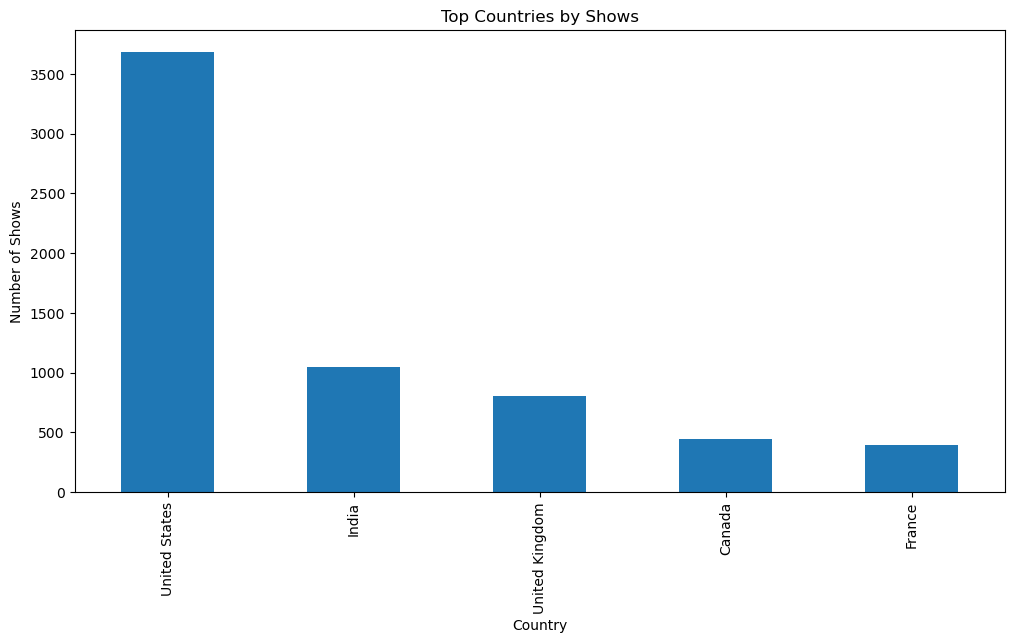

In [14]:
df_country_shows = (
    df[df['country_split'] != 'Unknown']
    .groupby('country_split')['show_id']
    .nunique()
    .sort_values(ascending=False)
    .head()
)

ax2 = df_country_shows.plot(kind='bar', figsize=(12,6))
ax2.set_xlabel("Country")
ax2.set_ylabel("Number of Shows")
ax2.set_title("Top Countries by Shows")

## Insights

From the above graph we see that **United States, India, United Kingdom** are top content-producing countries on the platform.

Text(0.5, 1.0, 'YoY Growth of Netflix Content')

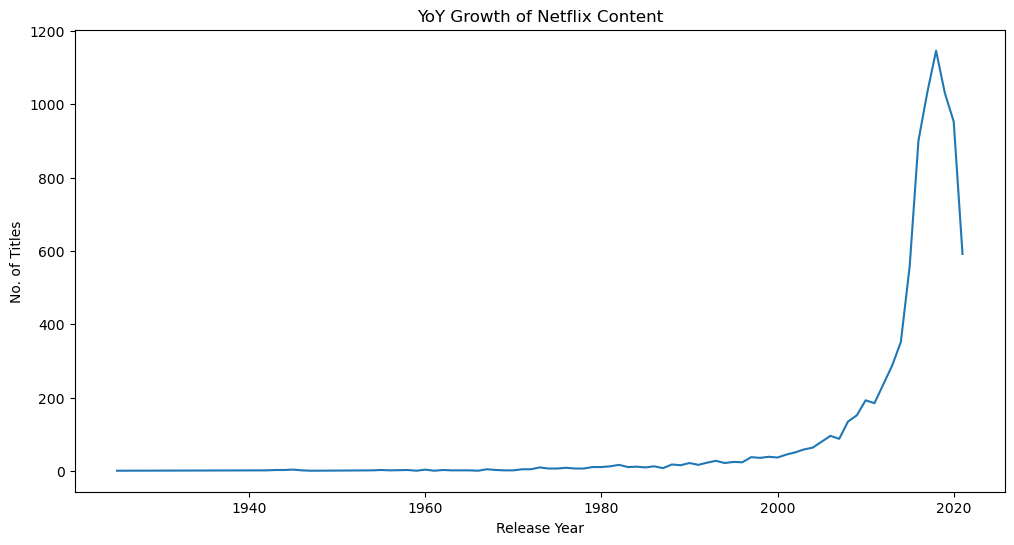

In [15]:
df_YoY_shows = df.groupby('release_year')['show_id'].nunique()
ax = df_YoY_shows.plot(figsize = (12,6))
ax.set_xlabel("Release Year")
ax.set_ylabel("No. of Titles")
ax.set_title("YoY Growth of Netflix Content")

## Insights

From the above graph we see Netflix’s content growth was minimal and stable before 2000, followed by a **steady increase after 2000**. A significant surge is observed post-2010, reflecting Netflix’s rapid expansion in content production.

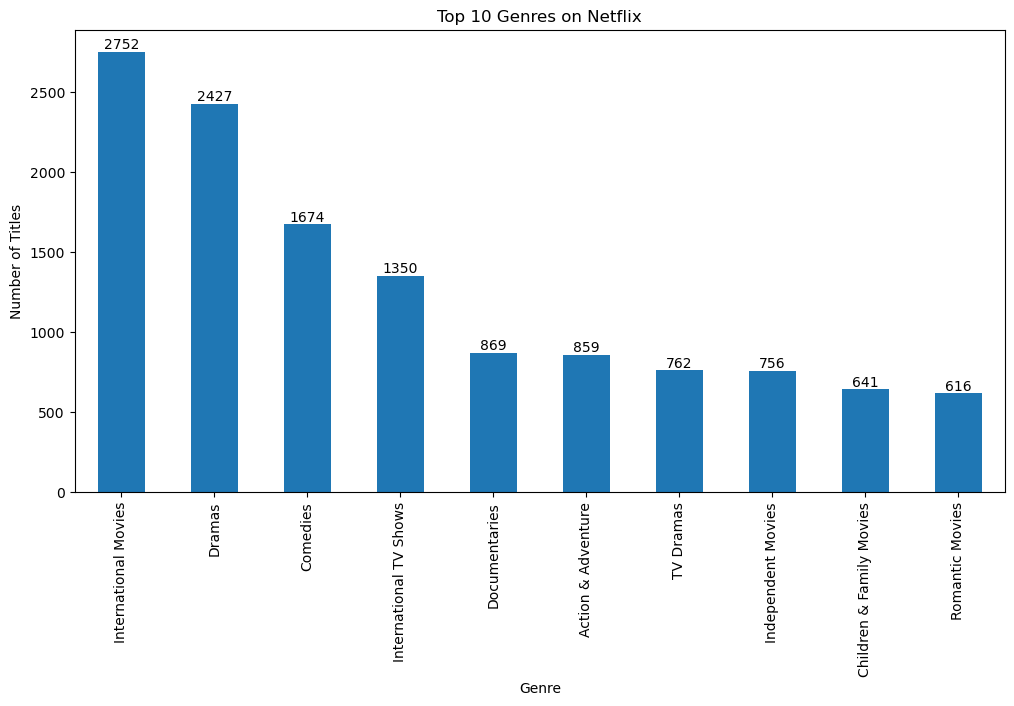

In [16]:
df['genre_split'] = df['listed_in'].str.split(', ')
df = df.explode('genre_split')
df['genre_split'].value_counts()

ax = df.groupby('genre_split')['show_id'] \
    .nunique() \
    .sort_values(ascending=False).head(10).plot(kind = 'bar', figsize = (12,6))
ax.set_xlabel('Genre')
ax.set_ylabel('Number of Titles')
ax.set_title('Top 10 Genres on Netflix')

for bars in ax.containers:
    ax.bar_label(bars)

## Insights

From the above chart, we see that **International movies, Dramas, Comedies** and **International TV shows** are the most prevalent genres on Netflix..

<Axes: xlabel='release_year'>

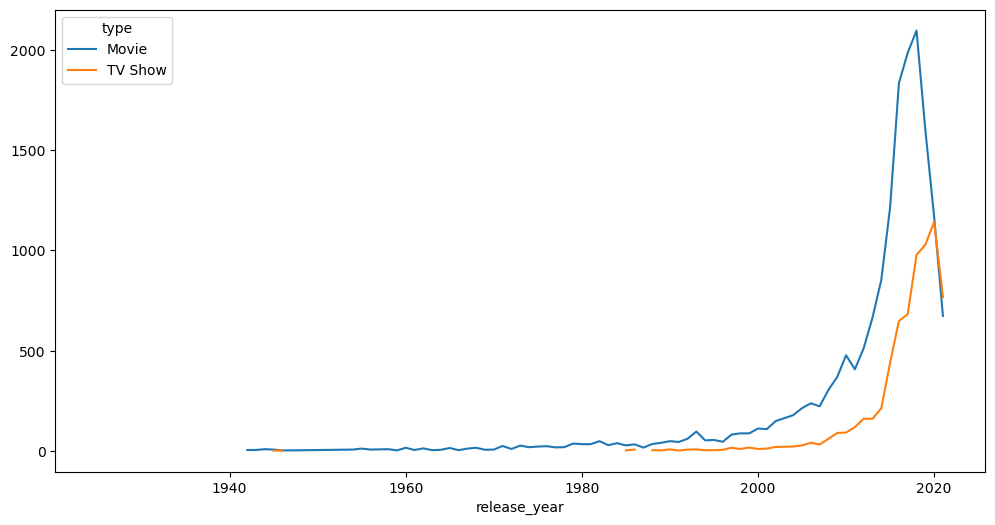

In [17]:
df.groupby(['release_year', 'type']).size().unstack().plot(kind='line', figsize=(12,6))

## Insights

The line chart indicates that Movies have consistently been the dominant content type on Netflix, with a sharp and sustained increase in production after 2010.

## Conclusion

Netflix’s content library is predominantly movie-driven, with the United States, India, and the United Kingdom emerging as the leading content-producing countries. Content production remained relatively stable before the 2000s but experienced a sharp and sustained increase after the 2010s, reflecting Netflix’s expansion into original content. Additionally, the platform’s catalog is heavily concentrated around International Movies, Dramas, and Comedies, highlighting a strategic focus on globally scalable genres.”